In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    auc = norm.cdf(np.sqrt(2)*maha_dist)
    return auc

/home1/jrudoler/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
maha_post = pd.read_pickle("simulate_maha_post.pkl")
maha_pre = pd.read_pickle("simulate_maha_pre.pkl")
maha_post

,param,score,perm_scores,pval
0,0.0,0.457246,"[0.48244824482448245, 0.4946494649464946, 0.50...",0.854429
1,0.0,0.507386,"[0.5443674002612802, 0.43794593508190127, 0.47...",0.439312
2,0.0,0.485849,"[0.46484648464846484, 0.4763476347634764, 0.44...",0.637073
3,0.0,0.489462,"[0.4799277398635086, 0.5156563629064632, 0.528...",0.607678
4,0.0,0.520700,"[0.5609000000000001, 0.45310000000000006, 0.49...",0.315937
...,...,...,...,...
2495,1.5,0.625463,"[0.48494849484948493, 0.4831483148314831, 0.51...",0.002000
2496,1.5,0.535357,"[0.5087139423076923, 0.5100160256410255, 0.499...",0.188362
2497,1.5,0.924284,"[0.570401862536694, 0.48213381921247084, 0.463...",0.000200
2498,1.5,0.526817,"[0.5084711779448622, 0.49223057644110274, 0.48...",0.263347


In [3]:
maha_post.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.493207  0.290590  0.501594  0.040381
0.375  0.459266  0.294403  0.506655  0.041491
0.750  0.353032  0.297815  0.531084  0.064145
1.125  0.315742  0.297967  0.547852  0.082382
1.500  0.224090  0.281435  0.584305  0.111338

In [4]:
maha_pre.groupby("param").agg({"pval":("mean", "std"), "score":("mean", "std")})

pval               score          
           mean       std      mean       std
param                                        
0.000  0.580438  0.285983  0.486167  0.042343
0.375  0.436265  0.285906  0.510753  0.044832
0.750  0.397734  0.300682  0.520563  0.059075
1.125  0.318618  0.283401  0.535742  0.064550
1.500  0.243771  0.285617  0.579780  0.112467

In [5]:
null_scores = maha_post.explode("perm_scores").groupby("param").agg({"perm_scores":("mean", "std")})

(array([14.,  7., 12.,  5., 11., 15.,  7., 10., 12.,  7.]),
 array([5.99880024e-04, 9.77804439e-02, 1.94961008e-01, 2.92141572e-01,
        3.89322136e-01, 4.86502699e-01, 5.83683263e-01, 6.80863827e-01,
        7.78044391e-01, 8.75224955e-01, 9.72405519e-01]),
 <BarContainer object of 10 artists>)

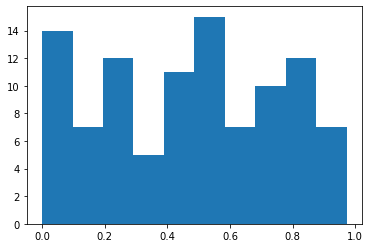

In [55]:
plt.hist(maha_pre[maha_pre.param==0.]['pval'])

In [56]:
(maha_pre[maha_pre.param==0.]['pval'] < .05).mean()

0.08

## Are we over-fitting or under-fitting?

In [5]:
maha_pre['expected_auc']= maha_pre['param'].apply(auc_from_maha)
maha_pre['type'] = "pre"
maha_post['expected_auc']= maha_post['param'].apply(auc_from_maha)
maha_post['type'] = "post"

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

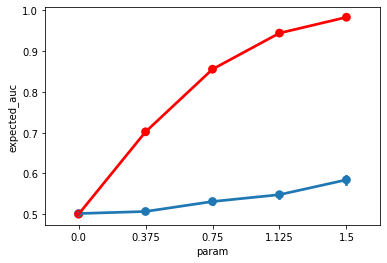

In [6]:
ax = sns.pointplot(data=maha_post, x="param", y="score",)
sns.pointplot(data=maha_post, x="param", y="expected_auc", ax =ax, color='red')
# sns.pointplot(data=null_scores, x="param", y="mean")

In [7]:
maha = pd.concat([maha_post, maha_pre])

In [37]:
sns.catplot?

Signature:
sns.catplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    estimator=<function mean at 0x2ac4ba52f550>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (

(0.3313885789468034, 1.0)

<Figure size 432x720 with 0 Axes>

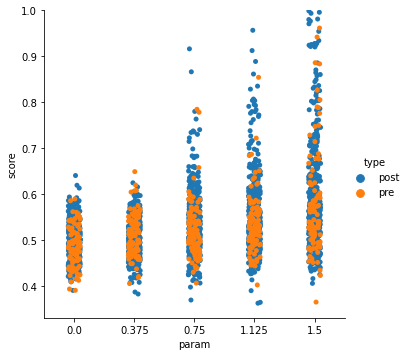

In [8]:
plt.figure(figsize=(6, 10))
sns.catplot(data=maha, x='param', y='score', hue="type", kind='strip')
plt.ylim(None, 1)

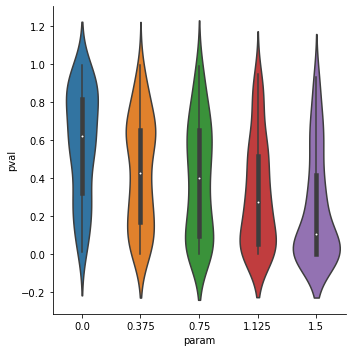

In [9]:
sns.catplot(data=maha_pre, x='param', y='pval', kind='violin')

<AxesSubplot:xlabel='param', ylabel='expected_auc'>

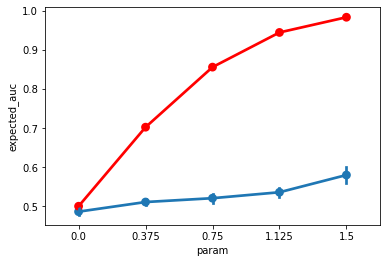

In [10]:
ax = sns.pointplot(data=maha_pre, x="param", y="score",)
sns.pointplot(data=maha_pre, x="param", y="expected_auc", ax =ax, color='red')

In [65]:
samplesize = pd.read_pickle("simulate_samplesize.pkl")

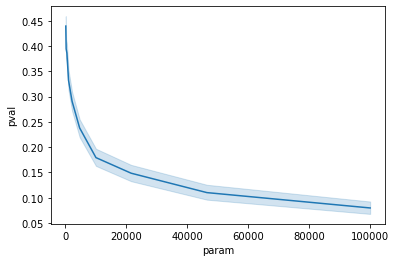

In [24]:
ax = sns.lineplot(data=samplesize, x="param", y="pval")

In [28]:
import time

In [47]:
time.strftime("%m%d%y_%H:%M")

'010223_14:32'